In [1]:
# 한글 형태소 분석
# konlpy 라이브러리 설치
!pip install konlpy

   ---------------------------------------- 0.0/19.4 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.4 MB 10.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.6/19.4 MB 6.0 MB/s eta 0:00:03
   --------- ------------------------------ 4.7/19.4 MB 7.1 MB/s eta 0:00:03
   ----------- ---------------------------- 5.8/19.4 MB 7.0 MB/s eta 0:00:02
   ---------------- ----------------------- 7.9/19.4 MB 7.4 MB/s eta 0:00:02
   ------------------- -------------------- 9.4/19.4 MB 7.5 MB/s eta 0:00:02
   ------------------------ --------------- 11.8/19.4 MB 7.9 MB/s eta 0:00:01
   ---------------------------- ----------- 13.6/19.4 MB 8.2 MB/s eta 0:00:01
   ------------------------------ --------- 14.7/19.4 MB 7.8 MB/s eta 0:00:01
   --------------------------------- ------ 16.5/19.4 MB 7.9 MB/s eta 0:00:01
   -------------------------------------- - 18.6/19.4 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 19.4/19.4 MB 8.0 MB/s eta 0:00:00

In [13]:
from konlpy.tag import Okt

okt=Okt()
print(okt.morphs('오늘 밤 주인공은 나야 나 나야 나'))  # 단어별 분리
print(okt.pos('오늘 밤 주인공은 나야 나 나야 나')) # 단어의 품사
print(okt.nouns('오늘 밤 주인공은 나야 나 나야 나')) # 명사만 추출
print(okt.phrases('오늘 밤 주인공은 나야 나 나야 나'))
print(okt.normalize('오늘 밤 주인공은 나야 나 나야 나'))

['오늘', '밤', '주인공', '은', '나야', '나', '나야', '나']
[('오늘', 'Noun'), ('밤', 'Noun'), ('주인공', 'Noun'), ('은', 'Josa'), ('나야', 'Noun'), ('나', 'Noun'), ('나야', 'Noun'), ('나', 'Noun')]
['오늘', '밤', '주인공', '나야', '나', '나야', '나']
['오늘', '오늘 밤', '오늘 밤 주인공', '나야', '나야 나', '나야 나 나야', '나야 나 나야 나', '주인공']
오늘 밤 주인공은 나야 나 나야 나


In [25]:
file=open('취임사/김대중_제15 대통령 취임사(국난극복과 재도약의 새시대를 엽시다)_1998.02.25.txt','r')
contents=file.read()
nouns=okt.nouns(contents)
nouns


['존경',
 '사랑',
 '국민',
 '여러분',
 '오늘',
 '저',
 '대한민국',
 '제',
 '대통령',
 '취임',
 '정부',
 '수립',
 '처음',
 '여야',
 '정권',
 '교체',
 '여러분',
 '온갖',
 '시련',
 '장벽',
 '국민',
 '정부',
 '를',
 '탄생',
 '국민',
 '여러분',
 '찬양',
 '감사',
 '말씀',
 '바',
 '저',
 '취임',
 '축하',
 '위해',
 '이',
 '자리',
 '김영삼',
 '전임',
 '대통령',
 '폰',
 '바이',
 '체커',
 '독일',
 '전',
 '대통령',
 '코',
 '손',
 '아키노',
 '필리핀',
 '전',
 '대통령',
 '후안',
 '안토니오',
 '사마란치',
 '위원장',
 '등',
 '내외',
 '귀빈',
 '비롯',
 '참석자',
 '여러분',
 '도',
 '깊이',
 '감사',
 '오늘',
 '이',
 '취임식',
 '역사',
 '의미',
 '참으로',
 '것',
 '오늘',
 '이',
 '땅',
 '처음',
 '민주',
 '정권',
 '교체',
 '실현',
 '날',
 '또한',
 '민주주의',
 '경제',
 '동시',
 '발전',
 '정부',
 '마침내',
 '탄생',
 '역사',
 '날',
 '이',
 '정부',
 '국민',
 '힘',
 '국민',
 '정부',
 '모든',
 '영광',
 '축복',
 '국민',
 '여러분',
 '제',
 '몸',
 '마음',
 '봉사',
 '것',
 '다짐',
 '바',
 '국민',
 '여러분',
 '우리',
 '후',
 '세기',
 '세기',
 '개막',
 '세기',
 '것',
 '혁명',
 '시작',
 '말',
 '지구',
 '인간',
 '탄생',
 '인간',
 '혁명',
 '농업혁명',
 '도시',
 '혁명',
 '사상',
 '혁명',
 '산업혁명',
 '혁명',
 '인류',
 '이제',
 '혁명',
 '시대',
 '것',
 '세계',
 '지금',
 '유형',
 '자원',
 '발전',
 '요소'

In [81]:
from collections import Counter # 문자열 객체의 중복 개수 딕셔너리로  

nouns_word=Counter(nouns)
nouns_top5=nouns_word.most_common(200)
print(type(nouns_top5))
nouns_dict=dict(nouns_top5)
print(type(nouns_dict))


<class 'list'>
<class 'dict'>


In [41]:
# 워드 클라우드
!pip install wordcloud

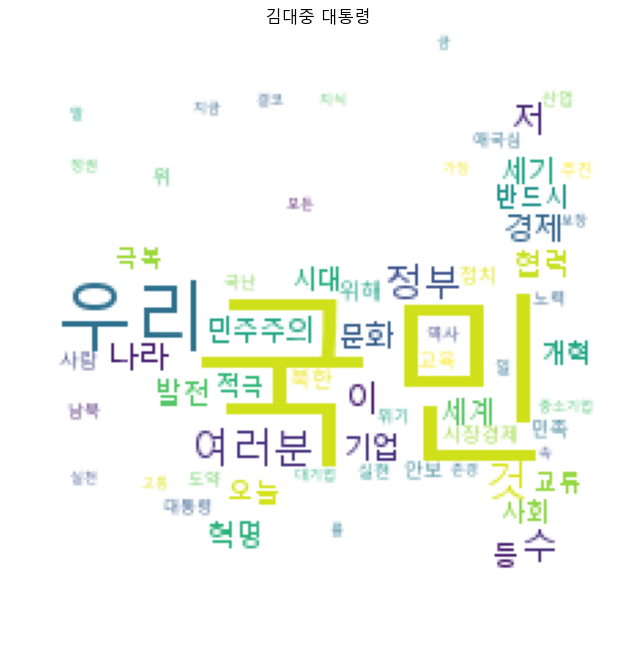

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

plt.rcParams['font.family']='Malgun Gothic'

mask=np.array(Image.open('imgs/cat1.jpg'))

wc=WordCloud(font_path='c:/windows/fonts/malgun.ttf',background_color='white',max_font_size=100,min_font_size=5,width=800,height=400,prefer_horizontal=30,
            mask=mask)

nouns_top100=nouns_word.most_common(1000)
cloud=wc.generate_from_frequencies(dict(nouns_top100))
plt.figure(figsize=(10,8))
plt.title('김대중 대통령')
plt.imshow(cloud)
plt.axis('off')
plt.show()